Osnabrück University - Computer Vision (Winter Term 2020/21) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 01: Basic Operations - Convolution

## Introduction

This is the first "real" homework sheet.

The homework sheets will usually be available on Saturday and are supposed to be solved in groups of three. They have to be handed in before Sunday morning of the following week. The exercises are then presented to your tutor in a small feedback session. To acquire the admission for the final exam, you will have to pass 𝑁−2 of the weekly provided exercise sheets.

Sign up for a group on Stud.IP (See Participants -> Functions/Groups). The times mentioned there are the times for the feedback session of your group. If none of them fits, send any of the tutors an e-mail so we can try to arrange something.

Your group will have a group folder in Stud.IP under Documents. Upload your solutions there to hand them in.

This week's sheet should be solved and handed in before the end of **Saturday, November 07, 2020**. Please upload your results to your group's Stud.IP folder. In case you cannot do this first sheet (due to technical or organizational problems) please upload a description of your problem instead. Your tutor will help you to solve the problems in the first feedback session and you may hand in this sheet together with the second sheet one week later.

## Assignment 1: Twodimensional Convolution [8 Points]

This exercise is purely theoretical and does not require implementation.

### a) Definition

Describe in your own words how convolution works.

Mathmatically, convolution is sum of element-wise multiplication. It use a matrix called 'Kernel' and calculates a sclar product of a (m*n) sized kernel and a corresponding sized patch of an image.

### b) Properties
Is convolution linear or non-linear? Is it homogenous or inhomogenous? Proof your answers.

1. Convolution is a linear operator. linearity can be established when L(a*g) = a*L(g) and L(g_1+g_2) = L(g_1) + L(g_2). As a convolution operator computes scalar product with each element linearly from the kernel and the image, It satisfies the conditions above.
2. It is homogenous, since it doesn't depend explicitly on location.

### c) Complexity

Assume an image $g$ of size $M\times N$ and a kernel $k$ of size $(2m+1)\times(2n+1)$. How many operations (additions and multiplications) are required to compute a convoluted image $g\ast k$ (of the same size as $g$)?

$$Multiplications per image = (2m+1) * (2n+1) * (M-2m) * (N-2n)$$


### d) Separability

What is a separable kernel? Describe, how it can be applied more efficiently. Compute the number of operations for getting $g\ast k$ (as in (c), but with a separable kernel $k$) and compare the results. Assume that the kernel is of size $m \times n$ and the image is of size $M \times N$. Compute the number of operations first for a single pixel and then extend your answer to the whole image. Ignore the normalization of the kernel, i.e. the fraction in front.

Note that here we define the kernel size as $m \times n$ as opposed to Assignment *1c)*. This is a shorter notation.

Seperabale kernels are those kernels that can be seperated across spatial axis. Seperable kernels can convolute image in more computationaly efficient way. The filter of MxN can be segregated into Mx1 and 1xN and then convoluted across the image.
$$Multiplications per image (m x 1)= 1 * m * (M-m+1)---------eq1$$
$$Multiplications per image (1 x n)= 1 * n * (N-n+1)---------eq2$$
$$Total operations = eq1 + eq2
                 = m(M-m+1)+n(N-n+1)$$
                 

## Assignment 2: Applying Convolution [4 Points]

In this exercise you will apply convolution with different kernels. You may use the function `scipy.ndimage.filters.convolve` to solve this task. Check the documentation to learn how to use this function. In this assignment you do not have to implement the convolution yourself. Realize the following filters, describe their effect and possible applications.

### a) Box filter

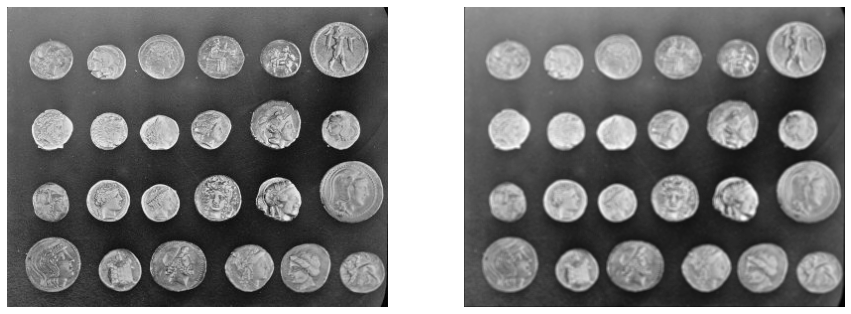

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data
from scipy import ndimage

# Load an image
# image = imread('me.jpg', pilmode = 'F')
image = data.coins().astype(np.float32)
image = np.array(image)
k = np.array([[1,1,1],[1,1,1],[1,1,1]])/9


filtered_image = scipy.ndimage.convolve(image, k, mode = 'constant', cval = 0.0) # replace this by your solution
# YOUR CODE HERE

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

### b) Gaussian filter

You may try different filter sizes.

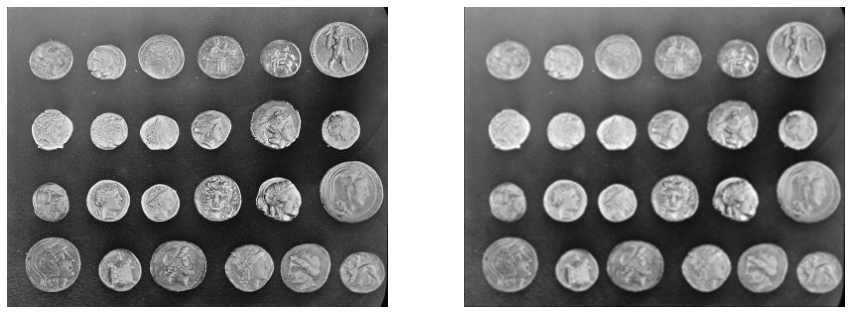

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data

# Load an image
#image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)
k = np.array([[1,2,1],[2,4,2],[1,2,1]])/64
# k = np.array([[1,3,3,1],[3,9,9,3],[3,9,9,3],[1,3,3,1]])/64

filtered_image = scipy.ndimage.convolve(image, k, mode = 'constant', cval = 0.0)# replace this by your solution
# YOUR CODE HERE

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

### c) Sobel filter

Try horizontal, vertical, and diagonal sobel filters.

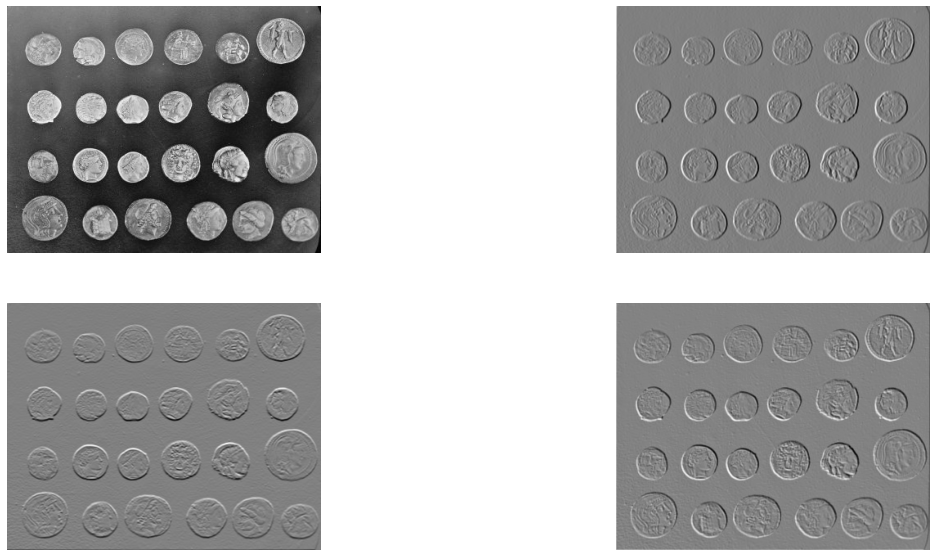

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data
import scipy.ndimage

# Load an image
# image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)
# image = imread('me.jpg', pilmode = 'F')

sobel_vertical = np.array([[1,0,-1],
                           [2,0,-2],
                           [1,0,-1]])/4
sobel_horizontal = np.array([[1,2,1],
                             [0,0,0],
                             [-1,-2,-1]])/4
sobel_diagonal = np.array([[0,-1,-2],
                           [1,0,-1],
                           [2,1,0]])/4

filtered_image_horizontal = scipy.ndimage.convolve(image, sobel_horizontal, mode = 'constant', cval = 0.0)
filtered_image_vertical = scipy.ndimage.convolve(image, sobel_vertical, mode = 'constant', cval = 0.0)
filtered_image_diagonal = scipy.ndimage.convolve(image, sobel_diagonal, mode = 'constant', cval = 0.0)
# YOUR CODE HERE

fig = plt.figure(figsize=(20,10))
a=fig.add_subplot(2,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(2,2,2)
plt.imshow(filtered_image_vertical, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(2,2,3)
plt.imshow(filtered_image_horizontal, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(2,2,4)
plt.imshow(filtered_image_diagonal, cmap = 'gray')
plt.axis('off')
plt.show()

In [5]:
scipy.ndimage.convolve?

### d) Unsharp Mask

One method to sharpen images is Unsharp Mask in which a negative unsharp mask is added to the original image as follows:

$$\text{Sharpened Image} = \text{Original Image} + (\text{Original Image} - \text{Unsharp Image}) \cdot \text{Amount}$$

The unsharp image can be computed by convolution with a Gaussian Kernel. Implement unsharp masking with a $5\times5$ Gaussian Kernel and a sharpening amount of $1.5$. Use the allready defined gaussian kernel "gauss_5".

Hint: To get good results the final images needs to be clipped to values between $0$ and $255$, i.e. all negative values are set to zero and all values bigger than $255$ are set to $255$.

You may experiment with large or negative sharpening amounts.

* Why is Unsharp Masking sharpening an image?
* What is the difference between normalizing and clipping an image?


1. The unsharp masking is sharping an image because when we substract blurred image from original image, the output
   is the detection of presence of edges. Hence we are creating high pass filter. Later we are selectively increasing    the value
   of the edges by multiplying it with amount

2. When we normalize an image we bring the range of pixels between [0, 1], by dividing with the maximum value.
   In case of clipping, we are hardcoding the minimum and maximum value value of our choice.

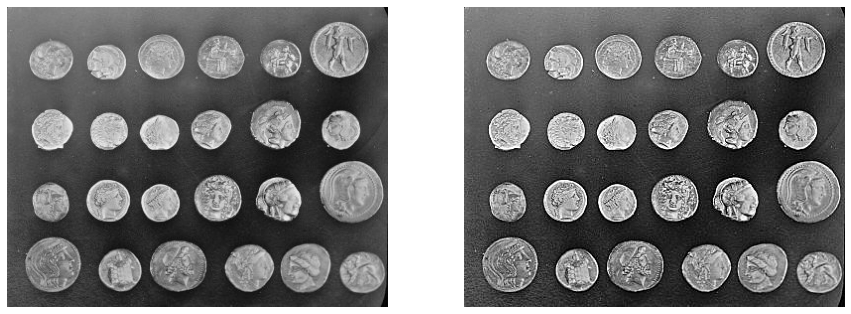

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data

# Load an image
#image = imread('some_file.png.jpg', mode='F')
image = data.coins().astype(np.float32)

# Define sharpening amount
amount = 1.5

# Define the filters:
gauss_5 = 1/256 * np.asarray([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])

blurred_image = ndimage.filters.convolve(image, gauss_5)
unsharped_mask_image = image + (image - blurred_image)*amount # replace this by your solution
unsharped_mask_image_new = np.clip(unsharped_mask_image, 0, 255)
# YOUR CODE HERE

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(unsharped_mask_image_new, cmap = 'gray')
plt.axis('off')
plt.show()


## Assignment 3: Implementing Convolution [8 Points]

Now implement your own 2-dimensional convolution function. The function should take an image and a kernel a argument and return an image of the same size, containing the result of convolving the image with the kernel.

You may notice a problem at the boundaries of the image. Describe the problem and possible solutions. Implement at least one of them.

Then apply your function with different kernels. Compare the results with [Assignment 2](#Assignment-2:-Applying-Convolution-[4-Points]).

The problem here is when you colvove an image with a filter, the result would not be the one with the same shape of the original image. The shape would decrease by 2*mh, 2*nh. You can pad the image with 0 or the nearest values to the boundaries or something else.I used a padding filled with value 0 for the solution of it.

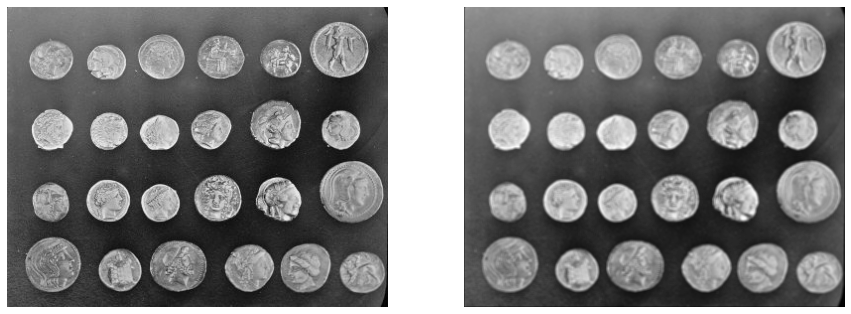

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

def my_convolve2d(img, kern):
    """Convolve an image with a kernel.

    Args:
        img (np.ndarray): The image, provided as a two-dimensional array.
        kern (np.ndarray): The kernel, also a two-dimensional array.
        
    Returns:
        result (np.ndarray): The convolved image. 
        
    """
    
    # store the image size for easier access
    M,N = img.shape
    # store the kernel size
    m,n = kern.shape
    # and also the half kernel size
    mh, nh = (m//2, n//2)
    
    # Initialize the result matrix
    
    
    padding = np.zeros((M+(2*mh), N+(2*nh)))
    padding[mh:M+mh, nh:N+nh] = img
    result = np.zeros((M,N)) 
    
    # Compute the convolution
    # YOUR CODE HERE
    for i in range(mh, M+mh):
        for j in range(nh, N+nh):
            result[i-mh, j-nh] = (padding[i-mh:i+mh+1, j-nh:j+nh+1] * kern).sum()
            
    return result

# Apply your function to an image:
# Try different filters, compare the results with Assignment 2


# Load the image
image = data.coins().astype(np.float32)

# Gaus5 = 1/256 * np.asarray([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])
box_3 = 1/9 * np.asarray([[1,1,1],[1,1,1],[1,1,1]])
filtered_image = my_convolve2d(image,box_3)

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

In [ ]:
import scipy

In [ ]:
filtered_image

array([[ 45.22222222,  76.11111111,  90.77777778, ...,   6.66666667,
          6.11111111,   3.22222222],
       [ 75.55555556, 122.33333333, 139.33333333, ...,  12.66666667,
          8.11111111,   5.        ],
       [ 86.33333333, 133.11111111, 141.88888889, ...,  19.55555556,
          7.66666667,   5.77777778],
       ...,
       [ 54.88888889,  79.11111111,  74.        , ...,   7.        ,
          6.11111111,   4.11111111],
       [ 55.55555556,  79.55555556,  73.66666667, ...,   7.        ,
          6.44444444,   4.77777778],
       [ 37.77777778,  53.55555556,  48.66666667, ...,   4.66666667,
          4.55555556,   3.55555556]])

In [ ]:
scipy.ndimage.convolve(image, box_3, mode = 'constant', cval = 0)

array([[ 45.22222  ,  76.111115 ,  90.77778  , ...,   6.6666665,
          6.111111 ,   3.2222223],
       [ 75.55556  , 122.333336 , 139.33333  , ...,  12.666667 ,
          8.111111 ,   5.       ],
       [ 86.333336 , 133.11111  , 141.88889  , ...,  19.555555 ,
          7.6666665,   5.7777777],
       ...,
       [ 54.88889  ,  79.111115 ,  74.       , ...,   7.       ,
          6.111111 ,   4.111111 ],
       [ 55.555557 ,  79.55556  ,  73.666664 , ...,   7.       ,
          6.4444447,   4.7777777],
       [ 37.77778  ,  53.555557 ,  48.666668 , ...,   4.6666665,
          4.5555553,   3.5555556]], dtype=float32)

The result from my own function and the result from the scipy.convolve function are more or less the same each other.